In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,TensorBoard, EarlyStopping


In [2]:
df = pd.read_json('../files/json/homelike_assignment_data.json', lines=True)

In [3]:
df = df[['event_type', 'user_country', 'page_country', 'env']].copy()

In [4]:
df = df[df['page_country'] != 'Unknown']

In [8]:
# Preprocess the data
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()


In [9]:
# Assuming 'page_country' is the target variable
y = label_encoder.fit_transform(df['page_country'])
y = one_hot_encoder.fit_transform(y.reshape(-1, 1)).toarray()  # Convert to dense array if needed


In [10]:
# Select and preprocess features as needed
# Example: Encoding a categorical feature
# This is a placeholder step - replace with actual preprocessing as needed
X = df.drop('page_country', axis=1)
# Assuming 'feature_name' is a categorical feature to be encoded
X['event_type'] = label_encoder.fit_transform(X['event_type'])
X['env'] = label_encoder.fit_transform(X['env'])
X['user_country'] = label_encoder.fit_transform(X['user_country'])

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert input features and labels to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [12]:

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer, adjust according to the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/30
15532/15532 [==============================] - 9s 557us/step - loss: 1.0994 - accuracy: 0.3339 - val_loss: 1.0986 - val_accuracy: 0.3376
Epoch 2/30
15532/15532 [==============================] - 9s 559us/step - loss: 1.0986 - accuracy: 0.3362 - val_loss: 1.0985 - val_accuracy: 0.3387
Epoch 3/30
15532/15532 [==============================] - 9s 564us/step - loss: 1.0986 - accuracy: 0.3357 - val_loss: 1.0985 - val_accuracy: 0.3387
Epoch 4/30
15532/15532 [==============================] - 9s 557us/step - loss: 1.0986 - accuracy: 0.3354 - val_loss: 1.0987 - val_accuracy: 0.3274
Epoch 5/30
15532/15532 [==============================] - 9s 603us/step - loss: 1.0986 - accuracy: 0.3357 - val_loss: 1.0986 - val_accuracy: 0.3338
Epoch 6/30
15532/15532 [==============================] - 9s 555us/step - loss: 1.0987 - accuracy: 0.3346 - val_loss: 1.0986 - val_accuracy: 0.3338
Epoch 7/30
15532/15532 [==============================] - 9s 559us/step - loss: 1.0986 - accuracy: 0.3359 - val_

In [13]:
model.save(f"../models/model_batch_size_{32}_epochs_{10}_train_{len(X_train)}.h5")

/Users/akesgazepides/Data_Pipeline_Optimization/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [18]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.099430,0.333905,1.098629,0.337580,0
1,1.098623,0.336194,1.098546,0.338731,1
2,1.098647,0.335726,1.098534,0.338731,2
3,1.098638,0.335446,1.098747,0.327431,3
4,1.098649,0.335687,1.098580,0.333838,4
5,1.098655,0.334615,1.098618,0.333838,5
6,1.098635,0.335935,1.098727,0.327423,6
7,1.098638,0.335122,1.098619,0.333838,7
8,1.098651,0.335160,1.098581,0.333838,8
9,1.098644,0.336186,1.098696,0.327423,9


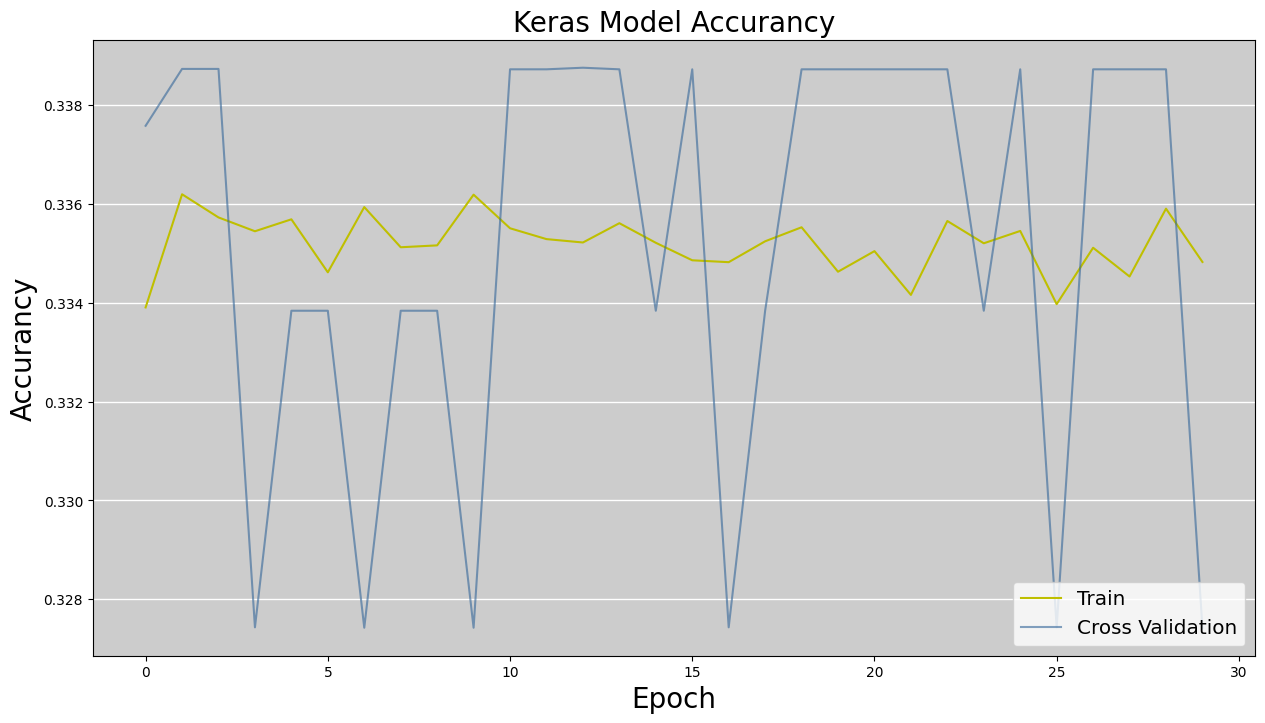

In [24]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'], color='y')
plt.plot(history.history['val_accuracy'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Accurancy',size=20)
plt.ylabel('Accurancy',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='lower right')
plt.show()



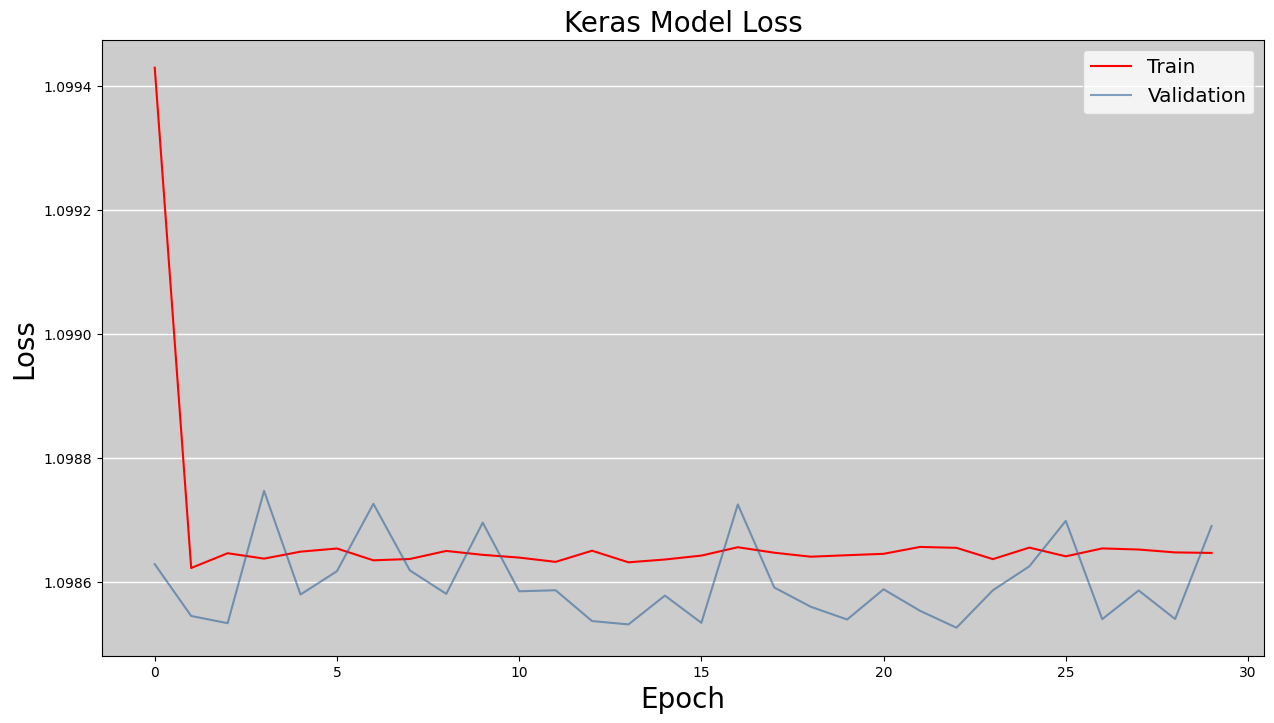

In [27]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Loss',size=20)
plt.ylabel('Loss',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Validation'],fontsize='x-large', loc='upper right')
plt.show()